[![Open In Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OleBo/MathSo/main?filepath=/notebooks/notebook13.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OleBo/MathSo/blob/main/notebooks/notebook13.ipynb)


[browse](http://colab.research.google.com/github/OleBo/MathSo/)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]  #larger figures

## 8.2 Konvergenzbetrachtungen

### Beispiel: Zweidimensionale Poisson-Gleichung mit finiten Differenzen

$-\Delta u = f$ in $Q = (0,1)^2, \qquad u = 0$ auf $\partial Q$ 

Wähle $f = 2 [(1 - 6 x^2) y^2 (1 - y^2) + (1 - 6 y^2) x^2 (1 - x^2)]$

$\Rightarrow$ Die exakte Lösung ist $u(x,y) = (x^2 - x^4)(y^4 - y^2)$.

In [2]:
def f(x, y):
    return 2.*((1. - 6.*x**2)*y**2*(1. - y**2) + (1. - 6.*y**2)*x**2*(1. - x**2))
def u_ex(x, y):
    return (x**2 - x**4)*(y**4 - y**2)
def u0(x, y):  # Anfangswerte
    return 0.*x**0  # konstant=0

In [3]:
def sor_poisson2d(f_, N, omega, u0, u_ex_, tol, order='lexi', maxits=1000, verbose=False):
    h = 1./(N+1)
    x1 = np.linspace(0, 1, N+2)
    x, y = np.meshgrid(x1, x1)
    f = f_(x, y)
    u = u0(x, y)
    u_ex = u_ex_(x, y)
    its = 0
    err = np.linalg.norm(u - u_ex)
    while err > tol and its < maxits:
        if order=='lexi':
            for i in range(1, N+1):
                for j in range(1, N+1):
                    u[i,j] = (1. - omega)*u[i,j] + .25*omega*(h**2*f[i,j] + u[i-1,j] + u[i+1,j] + u[i,j-1] + u[i,j+1])
        elif order=='redblack':
            for k in range(2):
                for i in range(1, N+1):
                    for j in range(1 + (k+i)%2, N+1, 2):
                        u[i,j] = (1. - omega)*u[i,j] + .25*omega*(h**2*f[i,j] + u[i-1,j] + u[i+1,j] + u[i,j-1] + u[i,j+1])
        err = np.linalg.norm(u - u_ex)
        if verbose:
            print("it {}, err = {}".format(its, err))
        its += 1
    return x, y, u, its

In [4]:
N = 32
omega = 1.
tol = 1e-1
x, y, u, its = sor_poisson2d(f, N, omega, u0, u_ex, tol, order='redblack')
print("{} Iterationen".format(its))

212 Iterationen


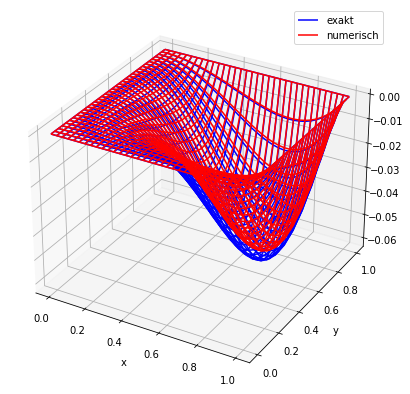

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, u_ex(x, y), color='b', label='exakt')
ax.plot_wireframe(x, y, u, color='r', label='numerisch')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()